In [1]:
import tensorflow as tf
from tensorflow import  keras
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/neural-nets/master/examples/complex/data/train.csv")
train_df.head()

,x,y,color
0,2.375386,-2.151675,0.0
1,0.155175,-3.939919,1.0
2,0.580631,-2.425793,1.0
3,2.045291,-2.755232,0.0
4,0.637783,-1.396165,1.0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20000 non-null  float64
 1   y       20000 non-null  float64
 2   color   20000 non-null  float64
dtypes: float64(3)
memory usage: 468.9 KB


In [4]:
unique_c = train_df["color"].unique()
unique_colors = list(unique_c)
unique_colors

[0.0, 1.0]

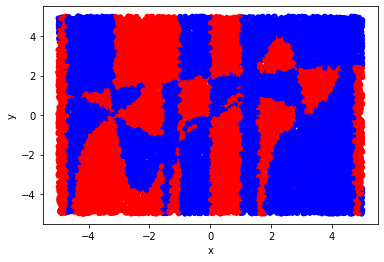

In [5]:
c = train_df["color"].map({0:"b",1:"r"})
train_df.plot(kind="scatter",x="x",y="y",c=c)

In [7]:
np.random.RandomState(seed=42).shuffle(train_df.values)
train_df.head()

,x,y,color
0,1.208589,-2.634155,0.0
1,2.888113,0.117534,0.0
2,1.989536,-0.586914,1.0
3,-1.131398,4.477444,1.0
4,4.553872,2.419774,0.0


In [11]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(2,activation="sigmoid")   
])

model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.fit(train_df[["x","y"]].values,train_df["color"].values,batch_size=4,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5000/5000 [==============================] - 9s 2ms/step - loss: 0.5922 - accuracy: 0.6675
Epoch 2/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.5357 - accuracy: 0.7431
Epoch 3/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.5068 - accuracy: 0.7670
Epoch 4/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.4849 - accuracy: 0.7764
Epoch 5/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.4573 - accuracy: 0.7844
Epoch 6/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.4250 - accuracy: 0.7995
Epoch 7/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3955 - accuracy: 0.8148
Epoch 8/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3649 - accuracy: 0.8324
Epoch 9/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3361 - accuracy: 0.8499
Epoch 10/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.3093 - accura

In [12]:
test_df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/neural-nets/master/examples/complex/data/test.csv")
test_df.head()

,x,y,color
0,-2.451839,-3.967665,1.0
1,-4.077216,1.063597,1.0
2,1.718660,-4.612983,1.0
3,-2.187174,-4.731947,1.0
4,-3.695086,1.364596,0.0


In [14]:
model.evaluate(test_df[["x","y"]].values,test_df["color"].values)

157/157 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.8584


[0.2968060374259949, 0.8583999872207642]